In [1]:
#imports
import os
import pandas as pd
import language_check
import re
import nltk
import spacy
import time
from urlextract import URLExtract
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import nltk.tokenize
from nltk.tokenize import word_tokenize,sent_tokenize
from afinn import Afinn
from textblob import TextBlob, Word, Blobber
import emoji
import regex


In [ ]:
file=pd.read_excel("Whatsapp_DB_new.xlsx")
file

In [ ]:
FSF=pd.read_csv("forward_Sentencefeature.csv")
file[["Messages"]].loc[FSF["oldmsgno"]].to_csv("Messages_for_Whatsapp.csv")

In [ ]:
File_messages=pd.read_csv("Messages_for_Whatsapp.csv")
File_messages

In [ ]:
#Clean messages
def clean_messages(dataframe,column):
    List=[]
    L=[]
    for i in dataframe[column]:
        if (("mrs." in i.lower()) | ("mr." in i.lower()) | ("rs." in i.lower()) | ("no." in i.lower()) |("dr." in i.lower())) :
            i=re.sub(r"\b[(M|m)][r][s][.]\s+\b", "Mrs.",i)
            i=re.sub(r"\b[(M|m)][r][.]\s+\b","Mr.",i)
            i=re.sub(r"\b[R|r][s][.]\s+\b","Rs.",i)
            i=re.sub(r"\b[(N|n)][o][.]\s+\b","No.",i)
            i=re.sub(r"\b[(D|d)][r][.]\s+\b","Dr.",i)
        else:
            i=i
        L.append(i)
    for sen in List:
        k=re.findall(r"\b\d{1,2}[.][ ]\b",sen)
        for i in k:
            if i in sen:
                sen=sen.replace(i,i.strip())
        L.append(sen)
    L=pd.DataFrame(L,columns=["Messages"])
    List1=[]
    for i in L["Messages"]:
        if re.findall(r'\b[0-9]{1,2}\s*[.]\s*\b',i):
            z=re.findall( r'\b[0-9]{1,2}\s*[.]\s*\b', i)
            for j in z:
                i=i.replace(j,j.rstrip(" "))
        if re.findall(r'(\b[Q][0-9]{1,2}[.]\s+\b)',i):
            z1=re.findall(r'(\b[Q][0-9]{1,2}[.]\s+\b)',i)
            for j in z1:
                i=i.replace(j,j.rstrip(" "))
        if re.findall(r'(\b[Q][0-9]{1,2}[)][.]\s+\b)',i):
            z2=re.findall(r'(\b[Q][0-9]{1,2}[)][.]\s+\b)',i)
            for j in z2:
                i=i.replace(j,j.rstrip(" "))
        if re.findall(r'(\b[(0-9)]{1,2}[.]\s+\b)',i):
            z3=re.findall(r'(\b[(0-9)]{1,2}[.]\s+\b)',i)         
            for j in z3:
                i=i.replace(j,j.rstrip(" "))
        if re.findall(r"\b[A-Za-z]{3,}\S*[.][A-Z]{1,}",i):
            m=re.findall(r"\b[A-Za-z]{3,}\S*[.][A-Z]{1,}",i)
            for j in m:
                i=i.replace(j,j[:j.rfind(".")]+". "+j[j.rfind(".")+1:])      
        else:
            i=i
        List1.append(i)
    return (pd.DataFrame(List1,columns=["Messages"]))

In [ ]:
clean_messages(File_messages,column="Messages")

In [ ]:
"""import pickle
ser=pickle.dumps(clean_messages)
ser
ser"""

In [ ]:
"""id2 = pickle.loads(ser)
id2(file,"Messages")"""

In [ ]:
Train=clean_messages(File_messages,column="Messages")

In [ ]:
"""f1=pd.read_csv("File_Modeller_final_facts_opinions.csv")
List=list(set(f1.message))"""

In [ ]:
Test=pd.DataFrame(columns=["Messages"])

In [ ]:
#Block to get a new message and append it to a dataframe
S=input()
L=[]
while S!='':
    L.append(S)
    S = input()
Testdata=pd.DataFrame(L,columns=["Messages"])
print(Testdata)

In [ ]:
#Sentence Tokenization
def cleanString(incomingString):
    newstring = incomingString
    newstring = newstring.replace("<br>", " ")
    newstring = newstring.replace('\n'," ")
    newstring = re.sub(r'\.+', ".", newstring)
    newstring = newstring.replace("*","")
    return newstring
def clean_text_test1(input_file): # 2nd parameter while function call ---> Ex: 'export_file_name.xlsx'
    df = pd.DataFrame()
    m=input_file['Messages'].apply(lambda i: cleanString(str(i)))
    item=m.apply(lambda i: nltk.sent_tokenize(i))
    item = pd.Series(item)
    df = df.append(item,ignore_index=False)
    result_df = df.transpose()
    data_dict = result_df.to_dict()
    df = pd.DataFrame.from_dict(data_dict)
    df=df.explode("Messages")
    df=df.rename_axis('Message', axis=1)
    df.rename(columns={"Messages":"Sentences"},inplace=True)
    return(df)
    

In [ ]:
Sentence_Tokenized=clean_text_test1(Train)
Sentence_Tokenized

In [ ]:
Sentence_Tokenized.to_csv("Sentence_Tokenized.csv")

In [ ]:
L=[]
L1=[]
def replace_NER(df,column):
    from collections import Counter 
    nlp=spacy.load("en_core_web_lg")
    tool = language_check.LanguageTool('en-US')
    df[column].fillna("Null",inplace=True)
    for text1 in df[column]:
        doc=nlp(str(text1))
        m=[ent.text for ent in doc.ents]
        count=0
        for i in m:
            text1=text1.replace(str(i),"X"+str(count))
            count+=1
        L.append(text1)
    df[column+str("_candidate")]=L
    for text in df[column+str("_candidate")]:
        matches=tool.check(str(text))
        L1.append([text[matches[i].fromx : matches[i].tox ] for i in range(0,len(matches))])
        L4=[0 if i==[] else len(i) for i in list(L1)]
    return L4


In [ ]:
#replace_NER(Sentence_Tokenized,"Sentences")

In [ ]:
def apply_func1(i):
        import re
        i=str(i)
        if re.findall(r'\b[0-9]{1,2}\s*[.]\s*\b',i):
            z=re.findall( r'\b[0-9]{1,2}\s*[.]\s*\b', i)
            for j in z:
                i=i.replace(j,j.rstrip(" "))
        if re.findall(r'(\b[Q][0-9]{1,2}[.]\s+\b)',i):
            z1=re.findall(r'(\b[Q][0-9]{1,2}[.]\s+\b)',i)
            for j in z1:
                i=i.replace(j,j.rstrip(" "))
        if re.findall(r'(\b[Q][0-9]{1,2}[)][.]\s+\b)',i):
            z2=re.findall(r'(\b[Q][0-9]{1,2}[)][.]\s+\b)',i)
            for j in z2:
                i=i.replace(j,j.rstrip(" "))
        if re.findall(r'(\b[(0-9)]{1,2}[.]\s+\b)',i):
            z3=re.findall(r'(\b[(0-9)]{1,2}[.]\s+\b)',i)         
            for j in z3:
                i=i.replace(j,j.rstrip(" "))
        else:
            i=i
        return i

In [ ]:
Sentence_Tokenized[Sentence_Tokenized["Sentences"].str.find("15-20")!=-1]

In [ ]:
def split_count(text):
    emoji_counter = 0
    data = regex.findall(r'\X', text)
    for word in data:
        if (any(char in emoji.UNICODE_EMOJI for char in word)):
            emoji_counter += 1
            # Remove from the given text the emojis
            text = text.replace(word, '') 
    words_counter = len(text.split())
    return emoji_counter

In [ ]:
first_person_pronouns=set(['i','me','my','mine','we','us','our','ours'])
import re
m="I sabella am bjj we n I memo there"
count=0
for i in first_person_pronouns:
    count = count+sum(1 for match in re.finditer(r"\b"+i+r"\b", m.lower()))
print(count)

In [ ]:
def feature_creation(Sentence_Tokenized,column):
    extractor = URLExtract()
    nlp = spacy.load("en_core_web_lg")
    af = Afinn()
    sid_obj = SentimentIntensityAnalyzer()
    ###################################################################
    Sentence_Tokenized["No_of_words"]=Sentence_Tokenized[column].str.count(" ")+1
    Sentence_Tokenized["Sentence_woe"]=Sentence_Tokenized[column].apply(lambda i : i.encode('ascii','ignore').decode('ascii'))
    Sentence_Tokenized[column]=Sentence_Tokenized[column].apply(lambda i : i.replace(",",", ") if re.findall(r"\b[a-zA-Z]+(?:,\S+)\b",i) else i)
    ####################################################################
    Sent_WOE=[]
    Sentence_Tokenized["Sentence_woe"]=Sentence_Tokenized["Sentence_woe"].apply(lambda i : apply_func1(i))
    #####################################################################
    List=[]
    URL=[]
    Sentence_Tokenized["Named_entities"]=Sentence_Tokenized["Sentence_woe"].apply(lambda x: [(X.text, X.label_) for X in nlp(x).ents])
    Sentence_Tokenized["Len_of_Named_entities"]=Sentence_Tokenized["Named_entities"].apply(lambda x: len(x))
    List_sent=[]
    List_pos=[]
    pos_tagged=[]
    for i in Sentence_Tokenized["Sentences"]:
          List_sent.append(nltk.word_tokenize(str(i)))
    for j in List_sent:
          List_pos.append(nltk.pos_tag(j))
    for k in List_pos:
        res=[lis[1] for lis in k] 
        pos_tagged.append(res)
    Sentence_Tokenized["Tokens"]=[str(i) for i in List_sent]
    Sentence_Tokenized["POS_tags_NLTK"]=pos_tagged
    Sentence_Tokenized["len_of_numerics"]=Sentence_Tokenized["Sentences"].apply(lambda x : len(re.findall(r'[-]?\d[\d,]*[\.:-]?[\d{2}]*',x)))
    Sentence_Tokenized["numbers in sentences"]=Sentence_Tokenized["Sentences"].apply(lambda x : (re.findall(r'[-]?\d[\d,]*[\.:-]?[\d{2}]*',x)))
    for i in Sentence_Tokenized["Sentences"]:   
        if ('http' in i.lower()) | ('www' in i.lower()):
            if i[i.find("http")-1]!=" ":
                m=i[0:i.find("http")]+" "+i[i.find("http"):-1]
                Sentence_Tokenized["Sentence_woe"]=Sentence_Tokenized["Sentence_woe"].replace(i,m)
            if i[i.find("www")-1]!=" ":
                m=i[0:i.find("www")]+" "+i[i.find("www"):-1]
                Sentence_Tokenized["Sentence_woe"]=Sentence_Tokenized["Sentence_woe"].replace(i,m)
            List.append(1)
        else:
            List.append(0)
    Sentence_Tokenized["Url_presence"]=List 
    first_person_pronouns=set(['i','me','my','mine','we','us','our','ours'])
    Sentence_Tokenized["First_person_pronouns"]=Sentence_Tokenized["Sentences"].apply(lambda x : 1 if first_person_pronouns.intersection(set(x.lower().split())) else 0)
    second_person_pronouns=set([ 'you','your','yours'])
    Sentence_Tokenized["Second_person_pronouns"]=Sentence_Tokenized["Sentences"].apply(lambda x : 1 if second_person_pronouns.intersection(set(x.lower().split())) else 0)
    Third_person_pronouns=set(["he", "him", "his", "himself", "she", "her", "hers", "herself","it", "its", "itself", "they", "them", "their", "theirs","themselves"]) 
    Sentence_Tokenized["Third_person_pronouns"]=Sentence_Tokenized["Sentences"].apply(lambda x : 1 if Third_person_pronouns.intersection(set(x.lower().split())) else 0)
    #########################################################################
    for i in Sentence_Tokenized["Sentence_woe"][Sentence_Tokenized["Url_presence"]==1]:
        urls = extractor.find_urls(i)
        if (urls!=[ ]):
            URL.append(urls)
        elif(urls==[ ]):
            URL.append(i[i.find("http"):i.find(" ",i.find("http"))])
    file=Sentence_Tokenized
    file["Total_Length"]=[len(str(i)) for i in file.Sentences]
    file["Total_length_without_spaces"]=file["Total_Length"]-file["No_of_words"]-1
    file["Avg_Length_of_words"]=file["Total_length_without_spaces"]/file["No_of_words"]
    file.loc[file['Url_presence'] == 1, 'URL_Validate'] = URL
    file.loc[file['Url_presence']== 0, 'URL_Validate'] = "No url" 
    file['No.of Uppercase words'] = file['Sentence_woe'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    file["Afinn_score"]=file["Sentence_woe"].apply(lambda x : af.score(str(x)))
    ###########################################################################
    List1=[]
    List2=[]
    List3=[]
    List4=[]
    senti=[]
    for i in file["Sentences"]:
        sentiment_dict = sid_obj.polarity_scores(str(i)) 
        List1.append(sentiment_dict['neg']*100) 
        List2.append(sentiment_dict['neu']*100) 
        List3.append(sentiment_dict['pos']*100)
        List4.append(sentiment_dict["compound"]*100)
        if  ((sentiment_dict['neg']) <= 0.05) and (sentiment_dict["pos"]-sentiment_dict["neg"])>0 and (sentiment_dict["neu"]>sentiment_dict["pos"]): 
                senti.append("Positive,Neutral") 
        elif ((sentiment_dict['pos']) <= 0.05) and (sentiment_dict["neg"]-sentiment_dict["pos"])>0 and (sentiment_dict["neu"]>sentiment_dict["neg"]): 
                senti.append("Negative,Neutral") 
        elif ((sentiment_dict['pos']) <= 0.05) and (sentiment_dict["neg"]-sentiment_dict["pos"])>0 and (sentiment_dict["neg"]>sentiment_dict["neu"]):
                senti.append("Negative") 
        elif ((sentiment_dict['neg']) <= 0.05) and (sentiment_dict["pos"]-sentiment_dict["neg"])>0 and (sentiment_dict["pos"]>sentiment_dict["neu"]):
                senti.append("Positive")
        elif (sentiment_dict["neu"]>sentiment_dict["pos"]) or (sentiment_dict["neu"]>sentiment_dict["neg"]): 
                senti.append("Neutral") 
        else:
                senti.append("Neutral")
    file["neg(%)_1"]=List1
    file["neu(%)_1"]=List2
    file["pos(%)_1"]=List3
    file["compound(%)_1"]=List4
    file["Overall_senti"]=senti
    file[['polarity', 'subjectivity']] = file['Sentence_woe'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))
    #############################################################################
    L3=[]
    for k in file["Sentence_woe"]:
        i=nlp(str(k))
        pos_tags = [(j.tag_) for j in i] 
        pos_tags1= [(j.pos_) for j in i]
        L3.append(pos_tags)
    file["pos_tags_spacy"]=L3
    f=open("alertwordslatest.txt")
    f1=open("triggerwords.txt")
    Lexicon_alerts=[]
    Lexicon_trigger=[]
    for i in f:
        Lexicon_alerts.append(i.lower().rstrip("\n\t"))
    for i in f1:
        Lexicon_trigger.append(i.lower().rstrip("\n\t"))
    file["Lexicon_triggers"]=file["Sentences"].apply(lambda i : 1 if (set(Lexicon_trigger).intersection(i.lower().split())) else 0)
    file["Lexicon_alerts"]=file["Sentences"].apply(lambda i : 1 if (set(Lexicon_alerts).intersection(i.lower().split())) else 0)
    file["Emoji_count"]=file["Sentences"].apply(lambda x :split_count(str(i)))
    file["Percentage_emoji"]=(file["Emoji_count"]*100/file["Total_Length"])
    ###########################################################################
    L2=["could","would","shall","should","can","may","must","will","might"]
    L3=["WDT","WP","WRB"]
    L4=["POS","PRP$","WP$"]
    file["Modal_Verbs"]=file.loc[:,"Sentences"].apply(lambda i: 1 if any(s in str(i).lower() for s in L2) else 0)
    file["Questions"]=file.loc[:,"POS_tags_NLTK"].apply(lambda i: 1 if any(s in str(i) for s in L3) else 0)
    file["Possessive_forms"]=file.loc[:,"POS_tags_NLTK"].apply(lambda i: 1 if any(s in str(i) for s in L4) else 0)
    ########################################################################
    present = ['VB','VBZ','VBP','VBG']
    past = ['VBD','VBN']
    Noun= ['NNP', 'NN', 'NNS', 'NNPS']
    file["Present_tense"]=file.loc[:,"POS_tags_NLTK"].apply(lambda i: 1 if any(s in i for s in present) else 0)
    file["Past_tense"]=file.loc[:,"POS_tags_NLTK"].apply(lambda i: 1 if any(s in i for s in past) else 0)
    file["Nouns"]=file.loc[:,"POS_tags_NLTK"].apply(lambda i: 1 if any(s in i for s in Noun) else 0)
    ########################################################################
    count=0
    VERB=['VB','VBZ','VBG','VBD','VBN','VBP']
    NOUN=['NNP', 'NN', 'NNS', 'NNPS']
    ADJ=['JJ','JJR',"JJS"]
    RB=['RB','RBR','WRB','RBZ']
    JJ=[]
    ADV=[]
    VB=[]
    NN=[]
    for i in file["pos_tags_spacy"]:
        m=len([x for x in i if x in ADJ])
        m0=(m/file["No_of_words"].iloc[count])*100
        JJ.append(m0)
        n=len([x for x in i if x in RB])
        n0=(n/file["No_of_words"].iloc[count])*100
        ADV.append(n0)
        o=len([x for x in i if x in VERB])
        o0=(o/file["No_of_words"].iloc[count])*100
        VB.append(o0)
        p=len([x for x in i if x in NOUN])
        p0=(p/file["No_of_words"].iloc[count])*100
        NN.append(p0)
        count+=1 
    file["%Adj"]=JJ
    file["%Adv"]=ADV
    file["%Verb"]=VB
    file["%Noun"]=NN
    file["Spelling_Grammar_errors"]=replace_NER(file,"Sentence_woe")
    ######################################################################
    return file

In [ ]:
start=time.time()
File1=feature_creation(Sentence_Tokenized,"Sentences")
end=time.time()
print(end-start)

In [ ]:
File1.to_csv("Model_features.csv")

In [ ]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
File_messages["Messages"].apply(lambda i: count(i,set(string.punctuation))).to_csv("punct_count.csv")

In [ ]:
File_model=pd.read_csv("Model_features.csv")


In [ ]:
#aggregation of the data as mean
def get_index_of_message(df):
    for i in range(0,len(df.columns.get_values())):
        if ((df.columns.get_values()[i].lower()=="Message") | (df.columns.get_values()[i].lower()=="Message")):
             return i
def get_agg_transpose(df,List1,List2):
        df1=df.copy()
        print(df1)
        df1=df.select_dtypes(include =['float64',"int64"])
        df1=df1.iloc[:,get_index_of_message(df1):]
        df1_sum_features=df1[List1]
        df1_mean_features=df1.drop(columns=List2,inplace=False)
        #df1_split_features=df1[List3]
        df3=pd.DataFrame()
        df4=pd.DataFrame()
        for i in list(set(df1["Unnamed: 0"])):
                df3[i]=df1_sum_features[df1["Unnamed: 0"]==i].sum()
        for i in list(set(df1["Unnamed: 0"])):
                df4[i]=df1_mean_features[df1["Unnamed: 0"]==i].agg(np.mean)
        #for i in list(set(df1["message"])):
                #df5[i]=[if df1_split_features[df1["message"]==i]>0 df1_mean_features[df1["message"]==i].agg(np.mean)
        return pd.concat([df3, df4], ignore_index=False).transpose()

In [ ]:
List1=["Avg_Length_of_words","First_person_pronouns","Facts/opinions","Second_person_pronouns","Third_person_pronouns","Len_of_Named_entities","Url_presence","Questions","len_of_numerics"]
List2=["Afinn_score","polarity","Avg_Length_of_words","Facts/opinions","First_person_pronouns","Second_person_pronouns","Third_person_pronouns","Len_of_Named_entities","Url_presence","Questions"]
Aggregated=get_agg_transpose(File,List1,List2)


In [ ]:
file=open("Indexes.txt")
List=[]
for i in file.readlines():
    List.append(int(i.strip()))

In [ ]:
File_com.index=Aggregated.index

In [ ]:
File_com=pd.read_csv("completesetfeaturesformodel1.csv")
Aggregated["Truthlabels"]=File_com["Truthlabels"]

In [2]:
Aggregated1=pd.read_csv("Aggregated_model.csv")
Aggregated1.columns

Index(['Unnamed: 0', 'Avg_Length_of_words', 'First_person_pronouns',
       'Facts/opinions', 'Second_person_pronouns', 'Third_person_pronouns',
       'Len_of_Named_entities', 'Url_presence', 'Questions', 'len_of_numerics',
       'No_of_words', 'len_of_numerics.1', 'Total_Length',
       'Total_length_without_spaces', 'No.of Uppercase words', 'neg(%)_1',
       'neu(%)_1', 'pos(%)_1', 'compound(%)_1', 'subjectivity',
       'Lexicon_triggers', 'Lexicon_alerts', 'Percentage_emoji', 'Emoji_count',
       'Modal_Verbs', 'Possessive_forms', 'Present_tense', 'Past_tense',
       'Nouns', '%Adj', '%Adv', '%Verb', '%Noun', 'Spelling_Grammar_errors',
       'Truthlabels', 'Sentence Absence of Threat/Alert/Warning',
       'Message Absence of Threat/Alert/Warning',
       'Message Forward carrot and stick', 'ask', 'com', 'come', 'day',
       'forward', 'free', 'friend', 'good', 'help', 'india', 'just', 'know',
       'life', 'like', 'make', 'message', 'num', 'people', 'phone', 'pron',
      

In [48]:
X1=Aggregated1[['First_person_pronouns',
       'Second_person_pronouns', 'Third_person_pronouns','Facts/opinions',
       'Len_of_Named_entities', 'Url_presence', 'Questions', 'len_of_numerics',
       'No_of_words', 'len_of_numerics.1', 'Total_Length',
       'No.of Uppercase words', 'neg(%)_1',
       'neu(%)_1', 'pos(%)_1', 'compound(%)_1', 'subjectivity',
       'Lexicon_triggers', 'Lexicon_alerts', 'Emoji_count', 'Percentage_emoji',
       'Modal_Verbs', 'Possessive_forms', 'Present_tense', 'Past_tense',
       'Nouns', '%Adj', '%Adv', '%Verb', '%Noun', 'Spelling_Grammar_errors',
        'Sentence Absence of Threat/Alert/Warning',
       'Message Absence of Threat/Alert/Warning',
       'Message Forward carrot and stick', 'ask', 'com', 'come',
       'day', 'forward', 'free', 'friend', 'good', 'help', 'india', 'just',
       'know', 'life', 'like', 'make', 'message', 'num', 'people', 'phone',
       'pron', 'receive', 'say', 'send', 'share', 'time', 'use', 'whatsapp',
       'work', 'year', 'Punct_count']]
Y1= Aggregated1['Truthlabels']

# RF CLASIFFIER

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,stratify=Y1,test_size=0.20)

In [50]:
y_train.value_counts()

4    156
0    137
1     42
3     26
2      5
Name: Truthlabels, dtype: int64

# Grid Search CV

In [31]:
# find the best hyper parameters using grid search cv
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(random_state=100)

parameter_grid = {'n_estimators': np.arange(50,500,50),
                  'min_samples_leaf': np.arange(2,100,5)}

gsc1 = GridSearchCV(rf, param_grid = parameter_grid,cv=5,scoring='f1_micro')

grid_result1=gsc1.fit(X_train,y_train)

print ("Best Score: {}".format(grid_result1.best_score_))
print ("Best params: {}".format(grid_result1.best_params_))

C:\Users\thambu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Score: 0.5983606557377049
Best params: {'min_samples_leaf': 2, 'n_estimators': 50}


In [57]:
# find the best hyper parameters using grid search cv

rf1 = RandomForestClassifier(n_estimators=150,min_samples_leaf=2,random_state=100,oob_score=True)
rf1.fit(X_train, y_train)
y_pred2 = rf1.predict(X_test)
print("Random Forest classifier has train accuracy of: ", rf1.score(X_train, y_train))

print("Random Forest classifier has test accuracy of: ", rf1.score(X_test, y_test))
# Evaluate the confusion_matrix
#confusion_matrix(Y_test, y_pred2)

Random Forest classifier has train accuracy of:  0.9890710382513661
Random Forest classifier has test accuracy of:  0.5869565217391305


In [58]:
rf1.oob_score_

0.5765027322404371

In [34]:
import matplotlib.pyplot as plt
importances = rf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices],
       color="blue", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])
plt.show()

Feature ranking:
1. feature 28 (0.047873)
2. feature 29 (0.042028)
3. feature 63 (0.038625)
4. feature 13 (0.036296)
5. feature 49 (0.034540)
6. feature 27 (0.032874)
7. feature 10 (0.032417)
8. feature 14 (0.030122)
9. feature 15 (0.029951)
10. feature 4 (0.029888)
11. feature 26 (0.029673)
12. feature 8 (0.026765)
13. feature 50 (0.026763)
14. feature 30 (0.026409)
15. feature 16 (0.024938)
16. feature 3 (0.024429)
17. feature 24 (0.023694)
18. feature 9 (0.023658)
19. feature 31 (0.023442)
20. feature 12 (0.023061)
21. feature 53 (0.021816)
22. feature 17 (0.020286)
23. feature 32 (0.018701)
24. feature 21 (0.018466)
25. feature 11 (0.018179)
26. feature 43 (0.017009)
27. feature 23 (0.016025)
28. feature 7 (0.015221)
29. feature 1 (0.014725)
30. feature 22 (0.014361)
31. feature 39 (0.013930)
32. feature 6 (0.013239)
33. feature 18 (0.013224)
34. feature 2 (0.012270)
35. feature 38 (0.011778)
36. feature 56 (0.010950)
37. feature 60 (0.010318)
38. feature 45 (0.009947)
39. feature 

<Figure size 640x480 with 1 Axes>

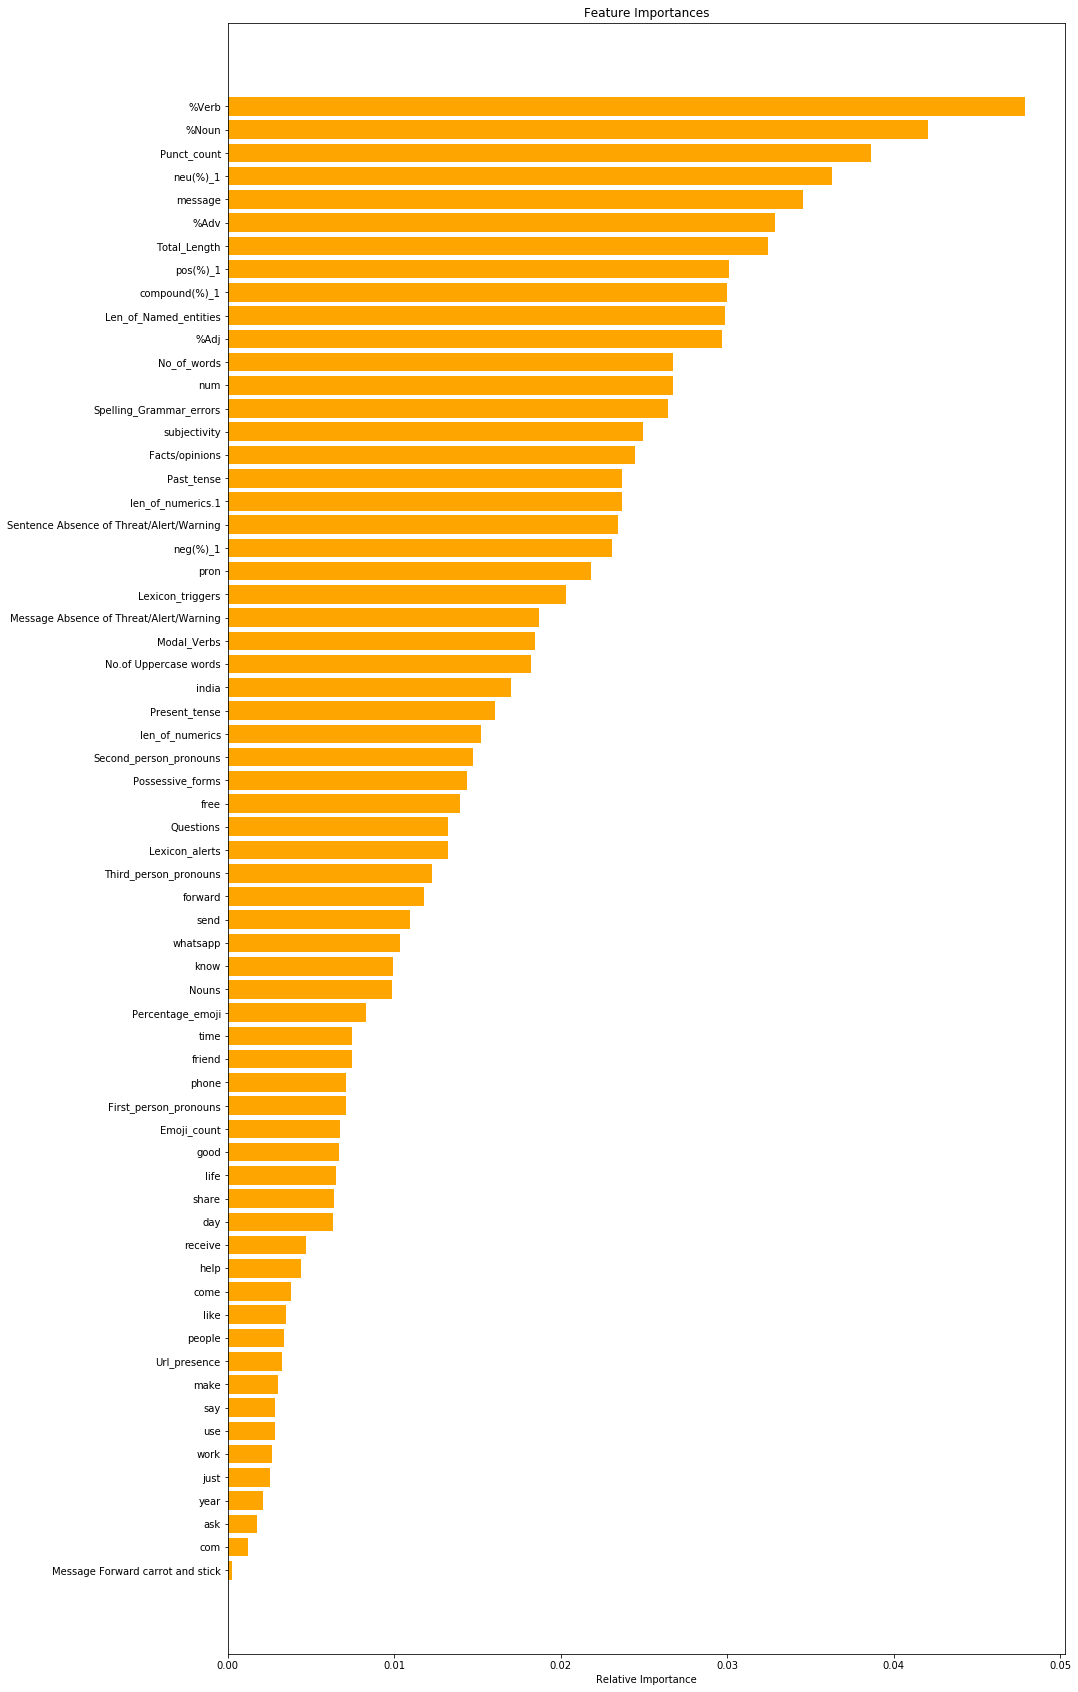

In [35]:
features = X1.columns
importances = rf1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,30))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Random Search CV

In [ ]:
"""# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} """

In [ ]:
"""from sklearn.model_selection import RandomizedSearchCV

gs_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv= 4,n_iter=100)

gs_random.fit(X_train,y_train)
print ("Best Score: {}".format(gs_random.best_score_))
print ("Best params: {}".format(gs_random.best_params_))"""

In [ ]:
y_train.value_counts().index

In [ ]:
labels=["Undetermined","Fully False","Fully True","Partially True","Partially False"]

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))

sns.barplot(x=labels,y=Y.value_counts(),color="skyblue")

plt.show()


In [ ]:
import seaborn as sns
index=y_train.value_counts().index
sns.barplot(x=labels,y=y_train.value_counts(),color="skyblue")

In [ ]:
plt.figure(figsize=(10,5))


sns.barplot(x=labels,y=y_test.value_counts(),color="skyblue")
plt.show()

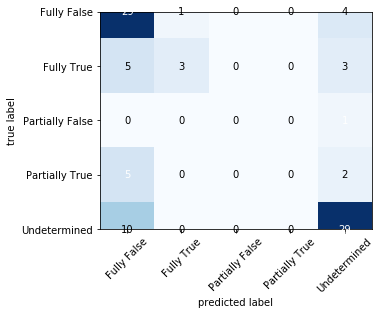

In [36]:
import mlxtend
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred2,binary=False)
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,class_names=["Fully False","Fully True","Partially False","Partially True","Undetermined"])
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.85      0.70        34
           1       0.75      0.27      0.40        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.74      0.74      0.74        39

    accuracy                           0.66        92
   macro avg       0.42      0.37      0.37        92
weighted avg       0.62      0.66      0.62        92



In [ ]:
df = pd.DataFrame(report).transpose()
df

In [ ]:
file=open("messages_new_old_index.txt")
L=[]
for i in file:
    m=(i[i.find(":")+1:i.find(",")])
    m=m.strip()
    L.append(int(m))
len(L)

In [ ]:
import string
import pandas as pd

m=pd.read_excel("Whatsapp_DB_new.xlsx")
m1=pd.read_csv("File_Modeller_final_facts_opinions.csv")
lis_index=list(set(m1["message"]))

M2=m.loc[L,"Messages"]
print(M2)
M2.to_excel("Final_msgs_submission.xlsx")
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
#pd.DataFrame([count(i, string.punctuation) for i in M2]).to_csv("File_punct.csv")

# XGB Classifier

In [59]:
# find the best hyper parameters using grid search cv
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

XGB = XGBClassifier(random_state=100)

parameter_grid = {'n_estimators': np.arange(50,500,50),
                  'min_samples_leaf': np.arange(1,50,10)}

gsc1 = GridSearchCV(XGB, param_grid = parameter_grid,cv=5,scoring='f1_micro')

grid_result1=gsc1.fit(X_train,y_train)

print ("Best Score: {}".format(grid_result1.best_score_))
print ("Best params: {}".format(grid_result1.best_params_))

KeyboardInterrupt: 

In [212]:
X1=Aggregated1[['First_person_pronouns',
       'Second_person_pronouns', 'Third_person_pronouns','Facts/opinions',
       'Len_of_Named_entities', 'Url_presence', 'Questions', 'len_of_numerics',
       'No_of_words', 'len_of_numerics.1', 'Total_Length',
       'No.of Uppercase words', 'neg(%)_1',
        'pos(%)_1', 'compound(%)_1', 'subjectivity','neu(%)_1',
       'Lexicon_triggers', 'Lexicon_alerts', 'Emoji_count', 'Percentage_emoji',
       'Modal_Verbs', 'Possessive_forms', 'Present_tense', 'Past_tense',
       'Nouns', '%Adj', '%Adv', '%Verb', '%Noun', 'Spelling_Grammar_errors',
        'Sentence Absence of Threat/Alert/Warning',
       'Message Absence of Threat/Alert/Warning',
       'Message Forward carrot and stick', 'ask', 'com', 'come',
       'day', 'forward', 'free', 'friend', 'good', 'help', 'india', 'just',
       'know', 'life', 'like', 'make', 'message', 'num', 'people', 'phone',
       'pron', 'receive', 'say', 'send', 'share', 'time', 'use', 'whatsapp',
       'work', 'year', 'Punct_count']]
Y1= Aggregated1['Truthlabels']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1,stratify=Y1,test_size=0.20)

In [61]:
XGB=XGBClassifier(nestimators=150,min_samples_leaf=1)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_samples_leaf=1, missing=None,
              n_estimators=100, n_jobs=1, nestimators=150, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [62]:
y_pred2 = XGB.predict(X_test)

In [64]:
print("XGB classifier has train accuracy of: ", XGB.score(X_train, y_train))
print("XGB classifier has test accuracy of: ", XGB.score(X_test, y_test))

XGB classifier has train accuracy of:  0.9918032786885246
XGB classifier has test accuracy of:  0.6304347826086957


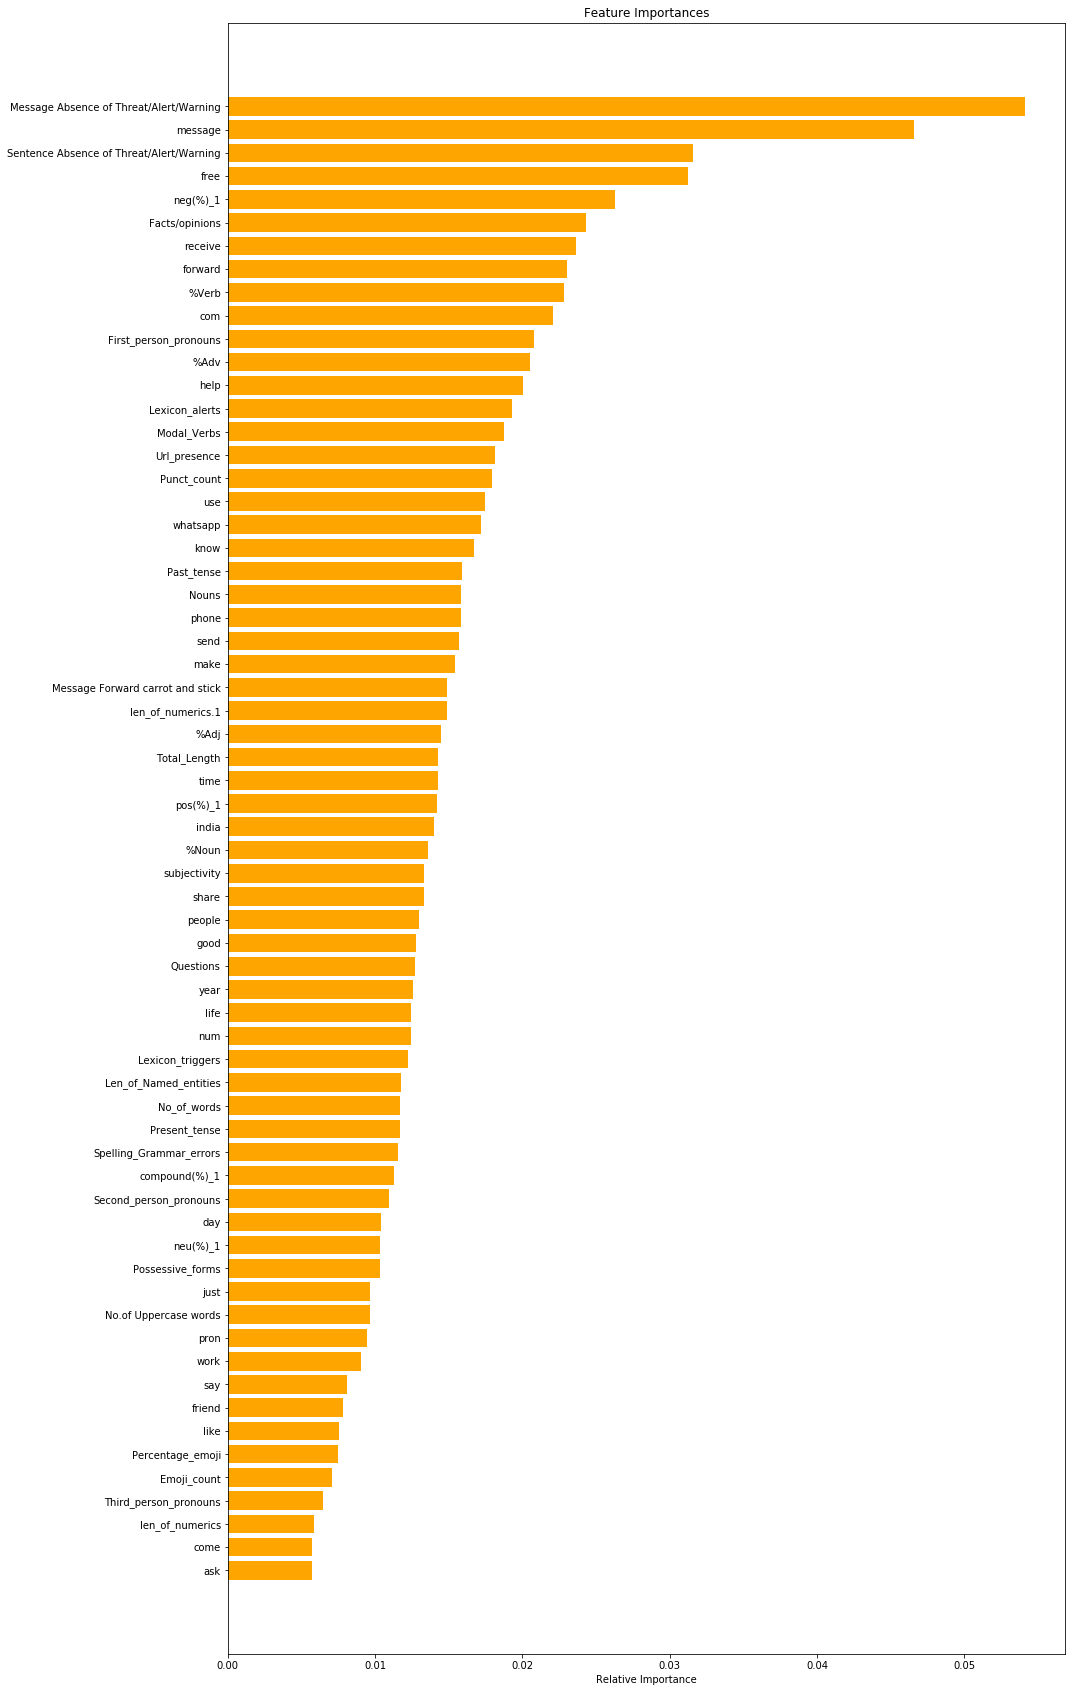

In [222]:
features = X1.columns
importances = XGB.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,30))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

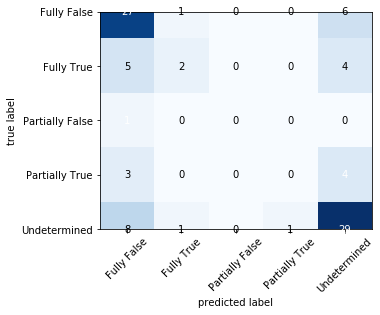

In [66]:
import mlxtend
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred2,binary=False)
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm,class_names=["Fully False","Fully True","Partially False","Partially True","Undetermined"])
plt.show()

In [223]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.6195652173913043

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

C:\Users\thambu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.61      0.79      0.69        34
           1       0.50      0.18      0.27        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         7
           4       0.67      0.74      0.71        39

    accuracy                           0.63        92
   macro avg       0.36      0.34      0.33        92
weighted avg       0.57      0.63      0.59        92



# Linear SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5,scoring='f1_micro')
svm_model.fit(X_train_scaled, y_train)

In [ ]:
print('Best score for training data:', svm_model.best_score_,"\n") 
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")


final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
#Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
#print(confusion_matrix(Y_test_label,Y_pred_label))
#print("\n")
#print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test ))



In [ ]:
Y_pred

In [ ]:
File4.columns

In [ ]:
X=File4[['ask', 'com', 'come', 'day',
       'forward', 'free', 'friend', 'good', 'help', 'india', 'just', 'know',
       'life', 'like', 'make', 'message', 'num', 'people', 'phone', 'pron',
       'receive', 'say', 'send', 'share', 'time', 'use', 'whatsapp', 'work',
       'year']]
Y=File4["Message Forward carrot and stick"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y,test_size=0.25)

In [ ]:
# find the best hyper parameters using grid search cv
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV

rf = RandomForestClassifier(random_state=100)

parameter_grid = {'n_estimators': np.arange(50,500,50),
                  'min_samples_leaf': np.arange(1,50,10)}

gsc1 = GridSearchCV(rf, param_grid = parameter_grid,cv=5,scoring='f1_micro')

grid_result1=gsc1.fit(X_train,y_train)

print ("Best Score: {}".format(grid_result1.best
                               _score_))
print ("Best params: {}".format(grid_result1.best_params_))

In [ ]:
rf1 = RandomForestClassifier(n_estimators=50
                             ,min_samples_leaf=1,random_state=100,oob_score=True)
rf1.fit(X_train, y_train)
y_pred2 = rf1.predict(X_test)
print("Random Forest classifier has train accuracy of: ", rf1.score(X_train, y_train))

print("Random Forest classifier has test accuracy of: ", rf1.score(X_test, y_test))
# Evaluate the confusion_matrix
#confusion_matrix(Y_test, y_pred2)

In [ ]:
import matplotlib.pyplot as plt
importances = rf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="blue", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
features = X.columns
importances = rf1.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(15,30))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred2, average='binary')